## 导入数据和数据描述

In [1]:
import numpy as np
import pandas as pd

In [2]:
subway_df = pd.read_csv('nyc-subway-weather.csv')

In [3]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [4]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


## 练习1：相关性

利用粗糙启发式算法来计算两列数据之间的相关性，即上一节中判断同一对数据是否均是>mean或<mean，或是一大一小。

[皮尔逊积矩相关系数（Pearson's r）](https://zh.wikipedia.org/wiki/%E7%9A%AE%E5%B0%94%E9%80%8A%E7%A7%AF%E7%9F%A9%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0)的道理就基于此，皮尔逊积矩相关系数比之前使用的启发式算法精确度要高，因为除了数据点所在的象限以外，它还会考虑到许多其他信息：比如某个数据点离均值很近，那么它对相关系数的贡献就比较小。

### 步骤：

1. 标准化每一个变量；
2. 将每一对标准化后的数据相乘，再求其平均值。

### 理解和解读相关性

[此页面](http://onlinestatbook.com/2/describing_bivariate_data/pearson.html)包含不同相关系数值的变量的部分散点图。

[此页面](http://rpsychologist.com/d3/correlation/)允许你使用滑块来更改相关系数，看看数据会如何呈现。

[皮尔逊积矩相关系数](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)仅测量**线性相关系数**！[这张图片](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg)展示了部分不同的线性和非线性关系，以及这些关系的皮尔逊积矩相关系数会是多少。

### 修正与未修正的标准偏差

默认情况下，`Pandas` 的 `std()` 函数使用[贝塞耳校正系数](https://en.wikipedia.org/wiki/Bessel%27s_correction)来计算标准偏差。调用 `std(ddof=0)` 可以禁止使用贝塞耳校正系数。

### 上一道练习题

你使用简单启发法估算相关系数的练习题是第二节课中的“Pandas Series”练习题。

### NumPy 中的皮尔逊积矩相关系数

`NumPy` 的 `corrcoef()` 函数可用来计算皮尔逊积矩相关系数，也简称为“相关系数”。

In [5]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    return np.corrcoef(x, y)

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))

print(correlation(entries, cum_entries))

[[1.         0.03564852]
 [0.03564852 1.        ]]
[[ 1.         -0.02669335]
 [-0.02669335  1.        ]]
[[ 1.         -0.22903432]
 [-0.22903432  1.        ]]
[[1.         0.58589547]
 [0.58589547 1.        ]]


## 练习2：DataFrame向量化运算

### Pandas shift()

`Pandas shift()` 函数的文档可以在[这里](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)找到。如果你仍不确定函数的运行机制，请一边尝试一边了解！

### 另一种方法
还有一种方法是通过向量化运算，你还可以使用代码 `return entries_and_exits.diff()` 在单个步骤中计算答案。

In [6]:
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1)

In [7]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [8]:
entries_and_exits.diff()

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## 练习3：DataFrame.applymap() / .apply()

`apply()`是一种让函数作用于列或者行操作；

`applymap()`是一种让函数作用于`DataFrame`每一个元素的操作；

`map`是一种让函数作用于`Series`每一个元素的操作。

### .applymap()

In [9]:
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [5, 10, 15]
})

def add_one(x):
    return x + 1

print(df.applymap(add_one))

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [10]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grade(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'

def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(convert_grade)

In [11]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


### .apply()

In [12]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print(convert_grades_curve(grades_df['exam1']), '\n')
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print(grades_df.apply(convert_grades_curve))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A] 

        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


### .apply() 案例一：由DataFrame生成DataFrame，计算DadaFrame各列的标准偏差

**注意**：为使计算能够正确进行，我们应该在 `.std()` 函数中将`“ddof”`参数的值设置为 `0`。

**注意**，计算得出的默认标准偏差类型在 `numpy` 的 `.std()` 和 `pandas` 的 `.std()` 函数之间是不同的。

默认情况下，`numpy` 计算的是**总体标准偏差**，`ddof = 0`。另一方面，`pandas` 计算的是**样本标准偏差**，`ddof = 1`。如果我们知道所有的分数，那么我们就有了总体——因此，要使用 pandas 进行归一化处理，我们需要将`“ddof”`设置为 `0`。

In [13]:
def standardize_column(column):
    return (column - column.mean()) / column.std()

In [14]:
standardize_column(grades_df['exam1'])

Andre     -2.196525
Barry      0.208891
Chris      0.018990
Dan       -0.170911
Emilio     0.715295
Fred      -0.487413
Greta      0.841896
Humbert   -0.803916
Ivan       1.284999
James      0.588694
Name: exam1, dtype: float64

In [15]:

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardize_column)

In [16]:
standardize(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


### .apply() 案例二：由DataFrame生成Series，寻找每一列的第二大值。

比如，`df.apply(np.max)` ≡ `df.max()`，左边为我们写的函数，右边为`df`自带的函数，这种情况下使用内置函数是简单的。但当没有满足需要的内置函数时，`apply`函数就非常有用了。

In [17]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# 这种做法时间复杂度增加了一倍
def second_largest_column_1(column):
    idx_max = column.idxmax()
    return column.drop(idx_max).max()

def second_largest_column_2(column):
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc[1]

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(second_largest_column_2)

second_largest(df)

a     4
b    40
c    20
dtype: int64

## 练习4：再次归一化每一列

In [18]:
# Adding with axis='index'
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df.add(s, axis='index'),'\n')
    # The functions sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df.add(s, axis='columns'), '\n')
    # The functions sub(), mul(), and div() work similarly to add()

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164 

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164 



In [19]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean()) / df.std(ddof=1)

In [20]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [21]:
standardize(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


## 练习5：Pandas groupby()

### 首先利用groupby来做出一周内每天平均的进入人数。

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [23]:
example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [24]:
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
grouped_data.groups

{False: Index(['a', 'b', 'e'], dtype='object'),
 True: Index(['c', 'd', 'f', 'g'], dtype='object')}

In [25]:
grouped_data.sum()

,value,above_three
even,,
False,5,0.0
True,16,3.0


In [26]:
# You can take one or more columns from the result DataFrame
grouped_data.sum()['value']

even
False     5
True     16
Name: value, dtype: int64

In [27]:
# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64

In [28]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [29]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

In [30]:
ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

Populating the interactive namespace from numpy and matplotlib


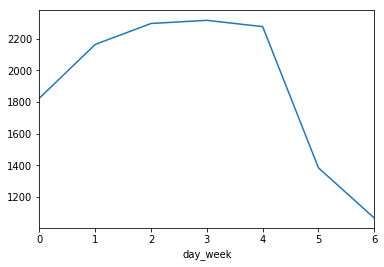

In [31]:
%pylab inline

ridership_by_day.plot()

从上图可以发现，周六周日的流量明显减少，这是因为这两天是双休日。

### 其次，我们使用groupby()计算每小时入站和出站数

在之前的测试题中，是对累计入站数的单一集合计算每小时入站和出站数。然而，在原始数据中，每个站台都有一个单独的数量集。

因此，要准确计算每小时入站和出站数，有必要按每天每站台进行分组，然后计算每天每小时入站和出站数。

写下能够完成此操作的一个函数。你应该使用 `apply()` 函数来调用你之前写的函数。你还应该确保将分组数据限制在入站和出站两列中，因为如果你的函数是在非数值型数据类型上被调用，那么它有可能会造成错误。

如果你希望了解在 `Pandas` 中使用 `groupby()` 函数的更多信息，可以访问此[页面](http://pandas.pydata.org/pandas-docs/stable/groupby.html)。

注意：你将无法使用此方法，在完整数据集中重新生成 `ENTRIESn_hourly` 和 `EXITSn_hourly` 列。在创建数据集时，我们做了额外的处理，删除了错误值。

In [32]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

grouped_data = example_df.groupby('even')
grouped_data.groups

{False: Index(['a', 'b', 'e'], dtype='object'),
 True: Index(['c', 'd', 'f', 'g'], dtype='object')}

In [33]:
grouped_data['value'].apply(standardize)

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64

In [34]:
# Find second largest value in each group
def second_largest(xs):
    sorted_xs = xs.sort_values(inplace=False, ascending=False)
    return sorted_xs.iloc[1]

grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(second_largest))

even
False    1
True     4
Name: value, dtype: int64


In [35]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [36]:
ridership_df

,UNIT,TIMEn,ENTRIESn,EXITSn
0,R051,00:00:00,3144312,1088151
1,R079,02:00:00,8936644,13755385
2,R051,04:00:00,3144335,1088159
3,R079,06:00:00,8936658,13755393
4,R051,08:00:00,3144353,1088177
5,R079,10:00:00,8936687,13755598
6,R051,12:00:00,3144424,1088231
7,R079,14:00:00,8936819,13756191
8,R051,16:00:00,3144594,1088275


In [37]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [38]:
ridership_df.groupby('UNIT').groups

{'R051': Int64Index([0, 2, 4, 6, 8], dtype='int64'),
 'R079': Int64Index([1, 3, 5, 7], dtype='int64')}

这个时候，我们可以看做这样，行由原来的9行变成两行，列现在没有了'UNIT'列，但是，还有剩余的三个列。

In [39]:
ridership_df.groupby('UNIT')['ENTRIESn', 'EXITSn'].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [40]:
def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits.groupby('UNIT')['ENTRIESn', 'EXITSn'].apply(hourly_for_group)

In [41]:
get_hourly_entries_and_exits(subway_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,15.0,34.0
6,1430341.0,963731.0
7,-1429834.0,-963573.0
8,490.0,132.0
9,231.0,232.0


## 练习6：合并 pandas DataFrame

In [42]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [43]:
subway_df.head(3)

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564


In [44]:
weather_df.head(3)

,DATEn,hour,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,05-01-11,0,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,05-01-11,0,40.691320,-73.867135,30.24,0,0,52.0,8.1
2,05-02-11,0,40.689945,-73.872564,30.32,0,0,48.9,6.9


In [45]:
subway_df.merge(weather_df,
               on=['DATEn', 'hour', 'latitude', 'longitude'],
               how='inner')

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564,30.32,0,0,48.9,6.9
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564,30.14,0,0,54.0,3.5
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564,29.98,0,0,57.2,15.0
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564,30.01,0,0,48.9,15.0
5,R004,05-01-11,0,14656120,14451774,40.691320,-73.867135,30.24,0,0,52.0,8.1
6,R004,05-02-11,0,14656174,14451851,40.691320,-73.867135,30.32,0,0,48.9,6.9
7,R004,05-03-11,0,14660126,14454734,40.691320,-73.867135,30.14,0,0,54.0,3.5
8,R004,05-04-11,0,14664247,14457780,40.691320,-73.867135,29.98,0,0,57.2,15.0
9,R004,05-05-11,0,14668301,14460818,40.691320,-73.867135,30.01,0,0,48.9,15.0


上述两张表，我们通过`'DATEn', 'hour', 'latitude', 'longitude'`这四个字段将其连接了起来，并选择`how='inner`来选择都存在于两个表之内的数据。

但如果列标签不同如何？可以使用如下参数调用：

In [46]:
subway_df.merge(weather_df,
               left_on=['DATEn', 'hour', 'latitude', 'longitude'],
               right_on=['DATEn', 'hour', 'latitude', 'longitude'], 
               how='inner')

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564,30.32,0,0,48.9,6.9
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564,30.14,0,0,54.0,3.5
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564,29.98,0,0,57.2,15.0
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564,30.01,0,0,48.9,15.0
5,R004,05-01-11,0,14656120,14451774,40.691320,-73.867135,30.24,0,0,52.0,8.1
6,R004,05-02-11,0,14656174,14451851,40.691320,-73.867135,30.32,0,0,48.9,6.9
7,R004,05-03-11,0,14660126,14454734,40.691320,-73.867135,30.14,0,0,54.0,3.5
8,R004,05-04-11,0,14664247,14457780,40.691320,-73.867135,29.98,0,0,57.2,15.0
9,R004,05-05-11,0,14668301,14460818,40.691320,-73.867135,30.01,0,0,48.9,15.0


## 练习7：使用DataFrame绘制图形

`DataFrame` 也像 `Pandas Series` 一样拥有 `plot()` 方法。如果 `df` 是 `DataFrame`，那么 `df.plot()` 将生成线条图，其中不同颜色的每条线代表 `DataFrame` 中的一个变量。这种方法能使你方便快速地查看数据，特别是对于小型 `DataFrame` 而言，但是对于更复杂的图形，你通常会希望直接使用 `matplotlib`。

在接下来的测试题中，根据纽约地铁数据创建你的图形，展现数据有趣的一面。例如，你可能会创建：

- 雨天和晴天地铁客流量直方图。
- 以经纬度作为 x 和 y 轴、客流量作为气泡大小的地铁站散点图。
    - 如果你选择此选项，你可能希望对 `groupby()` 使用 `as_index=False` 参数。以下测试题中有示例代码。
- 以地铁客流量作为一个轴、降雨量或温度作为另一个轴的散点图。

如果你不确定如何绘制出想要的图形，尝试在 Google 上进行搜索，或者查看 [`matplotlib`](https://matplotlib.org/api/pyplot_api.html) 文档。一旦你绘制出满意的图形，请分享至论坛！

In [47]:
example_df 

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [48]:
first_even = example_df.groupby('even').first()
print(first_even)
# print(first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame

       value  above_three
even                     
False      1        False
True       2        False


In [49]:
# groupby() with as_index=False
first_even = example_df.groupby('even', as_index=False).first()
print(first_even, '\n')
print(first_even['even']) # Now 'even' is still a column in the DataFrame

    even  value  above_three
0  False      1        False
1   True      2        False 

0    False
1     True
Name: even, dtype: bool


In [50]:
filename = 'nyc-subway-weather.csv'
subway_df = pd.read_csv(filename)
subway_df.head()
## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


### 绘制地铁站的散点图，并将维度和精度分别设为x轴和y轴，将客流量设为气泡大小

首先要按经纬度对数据进行分组，我还想计算出车站的平均客流量。

In [51]:
data_by_location = subway_df.groupby(['latitude', 'longitude']).mean()

In [52]:
data_by_location.head()

,,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
latitude,longitude,,,,,,,,,,,,,,,,,,,
40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,0.006284,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,0.006216,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,0.006183,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,0.006118,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,0.002744,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


接下里读取经纬度，以绘制散点图。

但如果直接在代码末尾添加维度，就会得到错误信息：`data_by_location.head()['longitude']`，这是因为经纬度已不是DataFrame的列，他们变成了DataFrame的行索引值。

可以在groupby函数中输入 `as_index=False` 来解决这个问题。

In [53]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [54]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


因为直接做散点图，每一个数据点会过大，所以最好先进行缩放。

每个值除以标准偏差。

In [55]:
scaled_entries = (data_by_location['ENTRIESn_hourly'] / 
                  data_by_location['ENTRIESn_hourly'].std())

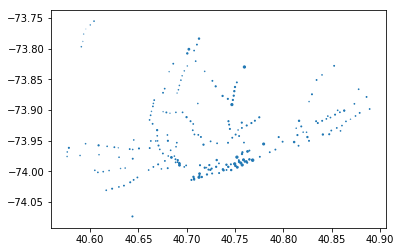

In [56]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'],
            s=scaled_entries)